<a href="https://colab.research.google.com/github/A01749373/retoTitanic/blob/main/retoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto Titanic

## Introducción

El Titanic fue una embarcación que en el 15 de abril de 1912 durante su trayecto de Southampton, UK con destino a Nueva York, USA, se hundió después de haber chocado contra un iceberg.  
  
Se estima que entre las 2224 personas que conformaban la tripulación, 1500 murieron, convirtiéndolo en el hundimiento naval más mortal de su época.

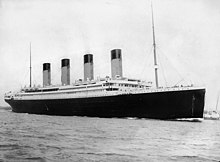

El Titanic no contaba con suficientes botes salvavidas, lo cual fue un factor importante en la mortalidad de este acontecimiento.  
  
Aunque gran parte de este evento y algunos factores de supervivencia se dieron a la suerte, hubo grupos de personas que tuvieron mas probabilidad de sobrevivir que otros.  
  
En este codigo se va a analizar cuales fueron estos factores para crear un modelo de inteligencia artificial que pueda predecir el perfil de las personas que son mas probables a sobrevivir este incidente.

## Lectura de Datos

In [2]:
#Se conecta este Notebook con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para poder leer, procesar y analizar los datos e informacion que sacaremos de dichos datos es necesario importar ciertas bibliotecas que nos ayudaran de forma importante: 

- Pandas: esta biblioteca nos ayuda a leer nuestros datos, al igual que modificar nuestros datos a traves de un data-frame para manipularlos y analizarlos. Para mas informacion haz click [aqui](https://pandas.pydata.org/).
- Numpy: esta biblioteca nos da diferentes herramientas matematicas vectorizadas para acelerar nuestros calculos. Para mas informacion haz click [aqui](https://numpy.org/).
- Matplotlib: esta biblioteca nos da la posibilidad de crear diferentes tipos de graficos con mucha personalizacion. Para mas informacion haz click [aqui](https://matplotlib.org/).
- Seaborn: esta biblioteca tambien nos da herramientas para poder graficar y visualizar datos, sin embargo, es para uso rapido ya que tiene muchas plantillas que podemos utilizar. Para mas informacion haz click [aqui](https://seaborn.pydata.org/).
- Scikit-learn: esta biblioteca es de las mas importantes que se utiliza ya que contiene la gran mayoria de herramientas de machine learning que se van a utilizar en este reto, desde regresiones hasta bosques aleatorios. Para mas informacion haz click [aqui](https://scikit-learn.org/stable/).
- Graphviz: esta biblioteca nos ayuda a imprimir diagramas que se van a utilizar mas adelante en este notebook. Para mas informacion haz click [aqui](https://graphviz.org/).

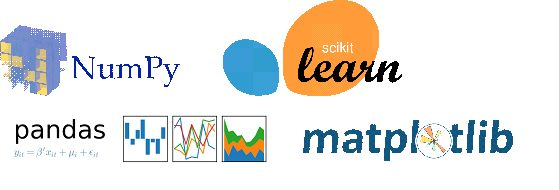

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz

Ahora vamos a obtener nuestros datos de nuestro data-set.
Nuestro archivo ```train.csv``` tiene varios datos con su resultado (variable dependiente) que se va a utilizar para nuestro conjunto de entrenamiento y validacion para los datos.  
  
Nuestro archivo ```test.csv``` tiene varios datos sin la variable independiente, lo cual nos sirve para probar nuestros modelos.  
  
Nuestro ultimo archivo ```gender_submission.csv``` cuenta con el genero de las personas.


In [4]:
path = "/content/drive/Shareddrives/Reto Titanic/Datasets/"
df_test = pd.read_csv(path + "test.csv")
df_train = pd.read_csv(path + "train.csv")
df_gender = pd.read_csv(path + "gender_submission.csv")

## Entendimiento de los Datos

Para poder tener un mejor concepto y contexto de nuestros data-set's, es necesario saber con que caracteristicas cuentan. Es por esto que debemos imprimir partes de los data-frames para saber con que estamos trabajando.

In [7]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [8]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
print(df_gender.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Ya que pudimos ver adentro de nuestros datos, podemos empezar a tomar decisiones incluso empezando nuestro trayecto.  
  

  
Nuestro data-set ```df_gender``` es un subconjunto de nuetsro data-set ```df_train``` asi que podemos no utilizarlo, al menos por el momento.

### Información Sobre los Datasets

Ya que sabemos que caracteristicas contiene cada data-set, ahora nos interesa que tipo de dato guarda en cada columna, asi como saber la cantidad de NaN's que se encuentran en nuestros sets.

In [10]:
print('df_test info: ')
df_test.info()
print('\ndf_train info: ')
df_train.info()

df_test info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

df_train info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 n

Nuestros data-sets se parecen bastante, contienen una combinacion de datos numericos con strings.  
  
Sin embargo, podemos ver que hay una gran cantidad de NaN's en algunas columnas, vamos a ahondar en esto:  

### Porcentaje Total de Valores Nulos

Al sacar el porcentaje y total de valores nulos, podemos empezar a tomar decisiones con contexto e informadas:

In [11]:
#Obtenemos el total de los valores nulos y los ordenamos de mayor a menor
total = df_train.isnull().sum().sort_values(ascending=False)

#Sacamos el porcentaje de estos valores nulos
percent_1 = df_train.isnull().sum() / df_train.isnull().count()*100

#Redondeamos para poder visualizarlo y analizarlo mejor
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

#Concatenamos esta columna a la tabla
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

#Imprimimos
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Hay una gran cantidad de valores nulos en nuestra caracteristica de ```Cabin```,  unos cuantos en ```Age``` y pocos en ```Embarked```.  
  
Por ahora tendremos esa informacion presente ya que tenemos que seguir analizando nuestros sets.

### Estadística Descriptiva de los DF

Ahora vamos a sacar unas metricas estadisticas para poder tener aun mas contexto y analizar de mejor forma nuestros datos.

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Estas metricas nos ayudan ya que nos dan una idea de que hacer con los datos, de donde salieron, cuales son los valores esperados de cada caracteristica, etc.

### Búsqueda de Correlaciones

Esta informacion es mas directa a nuestros modelos de machine learning ya que un coeficiente de correlacion nos indica de una forma matematica que caracteristicas es mas importante meter en nuestros modelos y que caracteristicas no tendran tanto peso.

In [14]:
# Matriz de Correlación
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


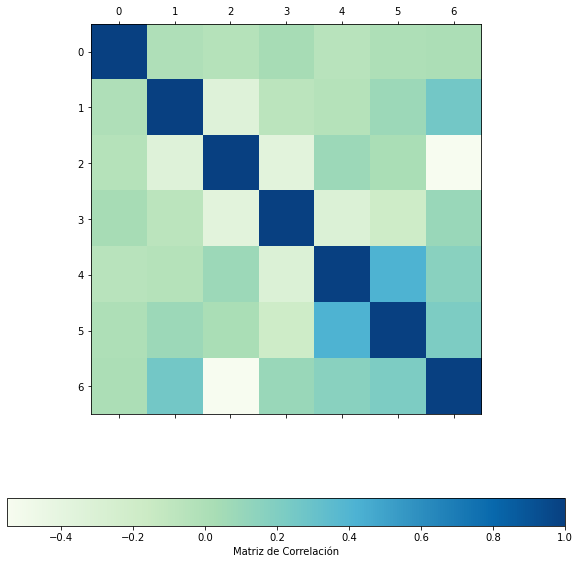

In [15]:
# Heat Map de Correlación
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.matshow(corr, cmap = 'GnBu')
plt.colorbar(label='Matriz de Correlación', orientation="horizontal")
plt.show()

## Análisis Estadístico

Text(0.5, 1.0, 'Male')

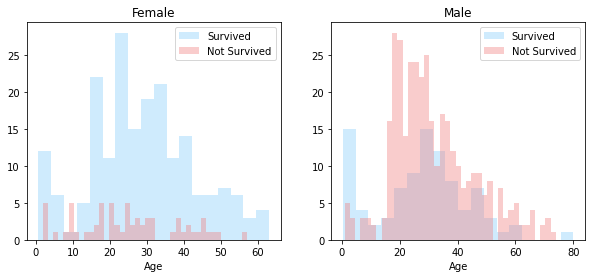

In [13]:
survived = 'Survived'
not_survived = 'Not Survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

women = df_train[df_train['Sex'] == 'female']
men = df_train[df_train['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False, color = 'lightskyblue')
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False, color = 'lightcoral')
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color = 'lightskyblue')
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color = 'lightcoral')
ax.legend()
ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


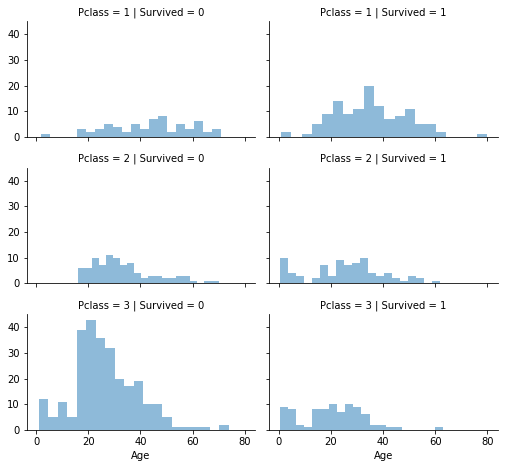

In [ ]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Limpieza de Datos

### Eliminando los Valores Nulos

In [ ]:
df_train_clean = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train_clean = df_train_clean.dropna()
dummy_pclass = pd.get_dummies(df_train_clean['Pclass'],prefix="Class")

dummy_embarked = pd.get_dummies(df_train_clean['Embarked'])
dummy_sex = pd.get_dummies(df_train_clean['Sex'])

df_train_clean = pd.concat([df_train_clean, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
df_train_clean = df_train_clean.drop(['Pclass', 'Sex', 'Embarked'], axis=1)


df_test_clean = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test_clean = df_test_clean.dropna()
dummy_pclass = pd.get_dummies(df_test_clean['Pclass'],prefix="Class")
dummy_embarked = pd.get_dummies(df_test_clean['Embarked'])
dummy_sex = pd.get_dummies(df_test_clean['Sex'])

df_test_clean = pd.concat([df_test_clean, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
df_test_clean = df_test_clean.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
corr = df_train_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,C,Q,S,female,male
Survived,1.000000,-0.082446,-0.015523,0.095265,0.266100,0.297908,0.086891,-0.335364,0.195673,-0.048966,-0.159015,0.536762,-0.536762
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.344976,0.009214,-0.309944,0.038268,-0.021693,-0.025431,-0.099037,0.099037
SibSp,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.036512,-0.052570,0.077060,-0.046227,0.051331,0.018968,0.106296,-0.106296
Parch,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.013514,-0.018558,0.027750,-0.009523,-0.009417,0.013259,0.249543,-0.249543
Fare,0.266100,0.093143,0.139860,0.206624,1.000000,0.596792,-0.140246,-0.402219,0.301337,-0.062346,-0.250994,0.182457,-0.182457
Class_1,0.297908,0.344976,-0.036512,-0.013514,0.596792,1.000000,-0.334442,-0.588670,0.335545,-0.086426,-0.271535,0.107152,-0.107152
Class_2,0.086891,0.009214,-0.052570,-0.018558,-0.140246,-0.334442,1.000000,-0.564948,-0.140605,-0.080929,0.168577,0.075347,-0.075347
Class_3,-0.335364,-0.309944,0.077060,0.027750,-0.402219,-0.588670,-0.564948,1.000000,-0.173178,0.145087,0.093140,-0.158446,0.158446
C,0.195673,0.038268,-0.046227,-0.009523,0.301337,0.335545,-0.140605,-0.173178,1.000000,-0.095623,-0.884986,0.103611,-0.103611
Q,-0.048966,-0.021693,0.051331,-0.009417,-0.062346,-0.086426,-0.080929,0.145087,-0.095623,1.000000,-0.378859,0.027256,-0.027256


In [ ]:
# Separando Dataframes 
dt_x = df_train_clean.drop(['Survived', 'SibSp', 'Parch'],axis=1)
dt_y = df_train_clean['Survived']

#dv_x = df_test_clean.drop(['Survived', 'Age', 'SibSp', 'Parch'],axis=1)
#dv_y = df_test_clean['Survived']

# Escalamiento
escalador = StandardScaler()
escalador.fit(dt_x)

dt_x = pd.DataFrame(escalador.transform(dt_x))
train_x, test_x, train_y, test_y = train_test_split(dt_x, dt_y, 
                                                    random_state=2)
train_x

,0,1,2,3,4,5,6,7,8,9
161,-0.803859,-0.501257,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,-0.756138,0.756138
441,1.267570,0.095134,1.693979,-0.566538,-0.997195,2.115874,-0.202326,-1.872519,1.322511,-1.322511
152,-0.734812,-0.504959,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,1.322511,-1.322511
504,0.784237,0.096788,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,1.322511,-1.322511
381,-1.908622,-0.421156,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,1.322511,-1.322511
...,...,...,...,...,...,...,...,...,...,...
534,-0.803859,-0.467389,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,1.322511,-1.322511
584,-0.078859,-0.349088,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,-0.756138,0.756138
493,2.165190,-0.042465,1.693979,-0.566538,-0.997195,-0.472618,-0.202326,0.534040,-0.756138,0.756138
527,0.922332,-0.501257,-0.590326,-0.566538,1.002813,-0.472618,-0.202326,0.534040,-0.756138,0.756138


### Completando Valores Nulos con Promedio

## Modelos de Predicción

### Redes Neuronales

In [ ]:
# Prueba 1
myTitanicNN = MLPClassifier(random_state = 0,
                            hidden_layer_sizes = (20, 20, 20, 20), 
                            activation = "logistic", 
                            verbose = False,
                            solver = "adam",
                            learning_rate = "adaptive", 
                            max_iter = 10000)
myTitanicNN.fit(train_x, train_y)
print('Prueba 1')
print('-' * 100)
print("My training score:", myTitanicNN.score(train_x, train_y))
print("My test score:", myTitanicNN.score(test_x, test_y))
print('-' * 100)

print(myTitanicNN.predict_proba([dt_x.loc[0]]))
print('Survived? Estimated: ', myTitanicNN.predict([dt_x.loc[0]]))
print('Real: ', dt_y.loc[0])

# Prueba 2
myTitanicNN2 = MLPClassifier(random_state = 1,
                           hidden_layer_sizes = (20, 20, 20, 20),
                           activation = "relu",
                           verbose = False,
                           solver = "lbfgs",
                           learning_rate = "adaptive", 
                           max_iter = 10000)
myTitanicNN2.fit(train_x, train_y)
print('Prueba 2')
print('-' * 100)
print("My training score:",myTitanicNN2.score(train_x,train_y))
print("My test score:",myTitanicNN2.score(test_x, test_y))
print('-' * 100)

print(myTitanicNN2.predict_proba([dt_x.loc[0]]))
print('Survived? Estimated: ', myTitanicNN2.predict([dt_x.loc[0]]))
print('Real: ', dt_y.loc[0])

Prueba 1
----------------------------------------------------------------------------------------------------
My training score: 0.5880149812734082
My test score: 0.6179775280898876
----------------------------------------------------------------------------------------------------
[[0.58650965 0.41349035]]
Survived? Estimated:  [0]
Real:  0
Prueba 2
----------------------------------------------------------------------------------------------------
My training score: 0.9606741573033708
My test score: 0.7584269662921348
----------------------------------------------------------------------------------------------------
[[0.96599707 0.03400293]]
Survived? Estimated:  [0]
Real:  0


In [ ]:
'''!pip install tensorflow
!pip list'''

'!pip install tensorflow\n!pip list'

In [ ]:
'''
#TENSORFLOW IMPLEMENTATION
import tensorflow as tf
from tensorflow.keras import Sequential #Foward Propagation Sequence
from tensorflow.keras.layers import Dense #Type of layer(All vs All)
from tensorflow.keras.losses import BinaryCrossentropy #Loss function for classification


#Hidden Layers AND Output Layer
layer_1=Dense(units=20,activation='relu')
layer_2=Dense(units=20,activation='relu')
layer_3=Dense(units=20,activation='relu')
layer_4=Dense(units=20,activation='relu')
layer_5=Dense(units=20,activation='relu')
layer_6=Dense(units=20,activation='relu')
layer_7=Dense(units=20,activation='relu')
layer_8=Dense(units=1,activation='sigmoid')

#Establish Architecture
modelTitanic=Sequential([layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8])#Array of layers

#Select Loss/Cost Funtion
modelTitanic.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])

#Train NN
modelTitanic.fit(dt_x,dt_y,epochs=5000)'''

"\n#TENSORFLOW IMPLEMENTATION\nimport tensorflow as tf\nfrom tensorflow.keras import Sequential #Foward Propagation Sequence\nfrom tensorflow.keras.layers import Dense #Type of layer(All vs All)\nfrom tensorflow.keras.losses import BinaryCrossentropy #Loss function for classification\n\n\n#Hidden Layers AND Output Layer\nlayer_1=Dense(units=20,activation='relu')\nlayer_2=Dense(units=20,activation='relu')\nlayer_3=Dense(units=20,activation='relu')\nlayer_4=Dense(units=20,activation='relu')\nlayer_5=Dense(units=20,activation='relu')\nlayer_6=Dense(units=20,activation='relu')\nlayer_7=Dense(units=20,activation='relu')\nlayer_8=Dense(units=1,activation='sigmoid')\n\n#Establish Architecture\nmodelTitanic=Sequential([layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8])#Array of layers\n\n#Select Loss/Cost Funtion\nmodelTitanic.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])\n\n#Train NN\nmodelTitanic.

In [ ]:
#modelTitanic.evaluate(test_x,test_y,verbose=2)

### Árboles de Decisión

In [ ]:
# Creación del árbol
myTree = tree.DecisionTreeClassifier(criterion = "entropy")
myTree.fit(dt_x, dt_y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
print(tree.export_text(myTree))

|--- feature_9 <= -0.28
|   |--- feature_4 <= 0.00
|   |   |--- feature_1 <= -0.11
|   |   |   |--- feature_1 <= -0.12
|   |   |   |   |--- feature_0 <= -0.42
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.42
|   |   |   |   |   |--- feature_0 <= -0.15
|   |   |   |   |   |   |--- feature_0 <= -0.29
|   |   |   |   |   |   |   |--- feature_1 <= -0.39
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  -0.39
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.29
|   |   |   |   |   |   |   |--- feature_1 <= -0.32
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  -0.32
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -0.15
|   |   |   |   |   |   |--- feature_0 <= 0.51
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.51
|   |   |   |   |   |   |   |--- feature_0 <= 0.65
|   

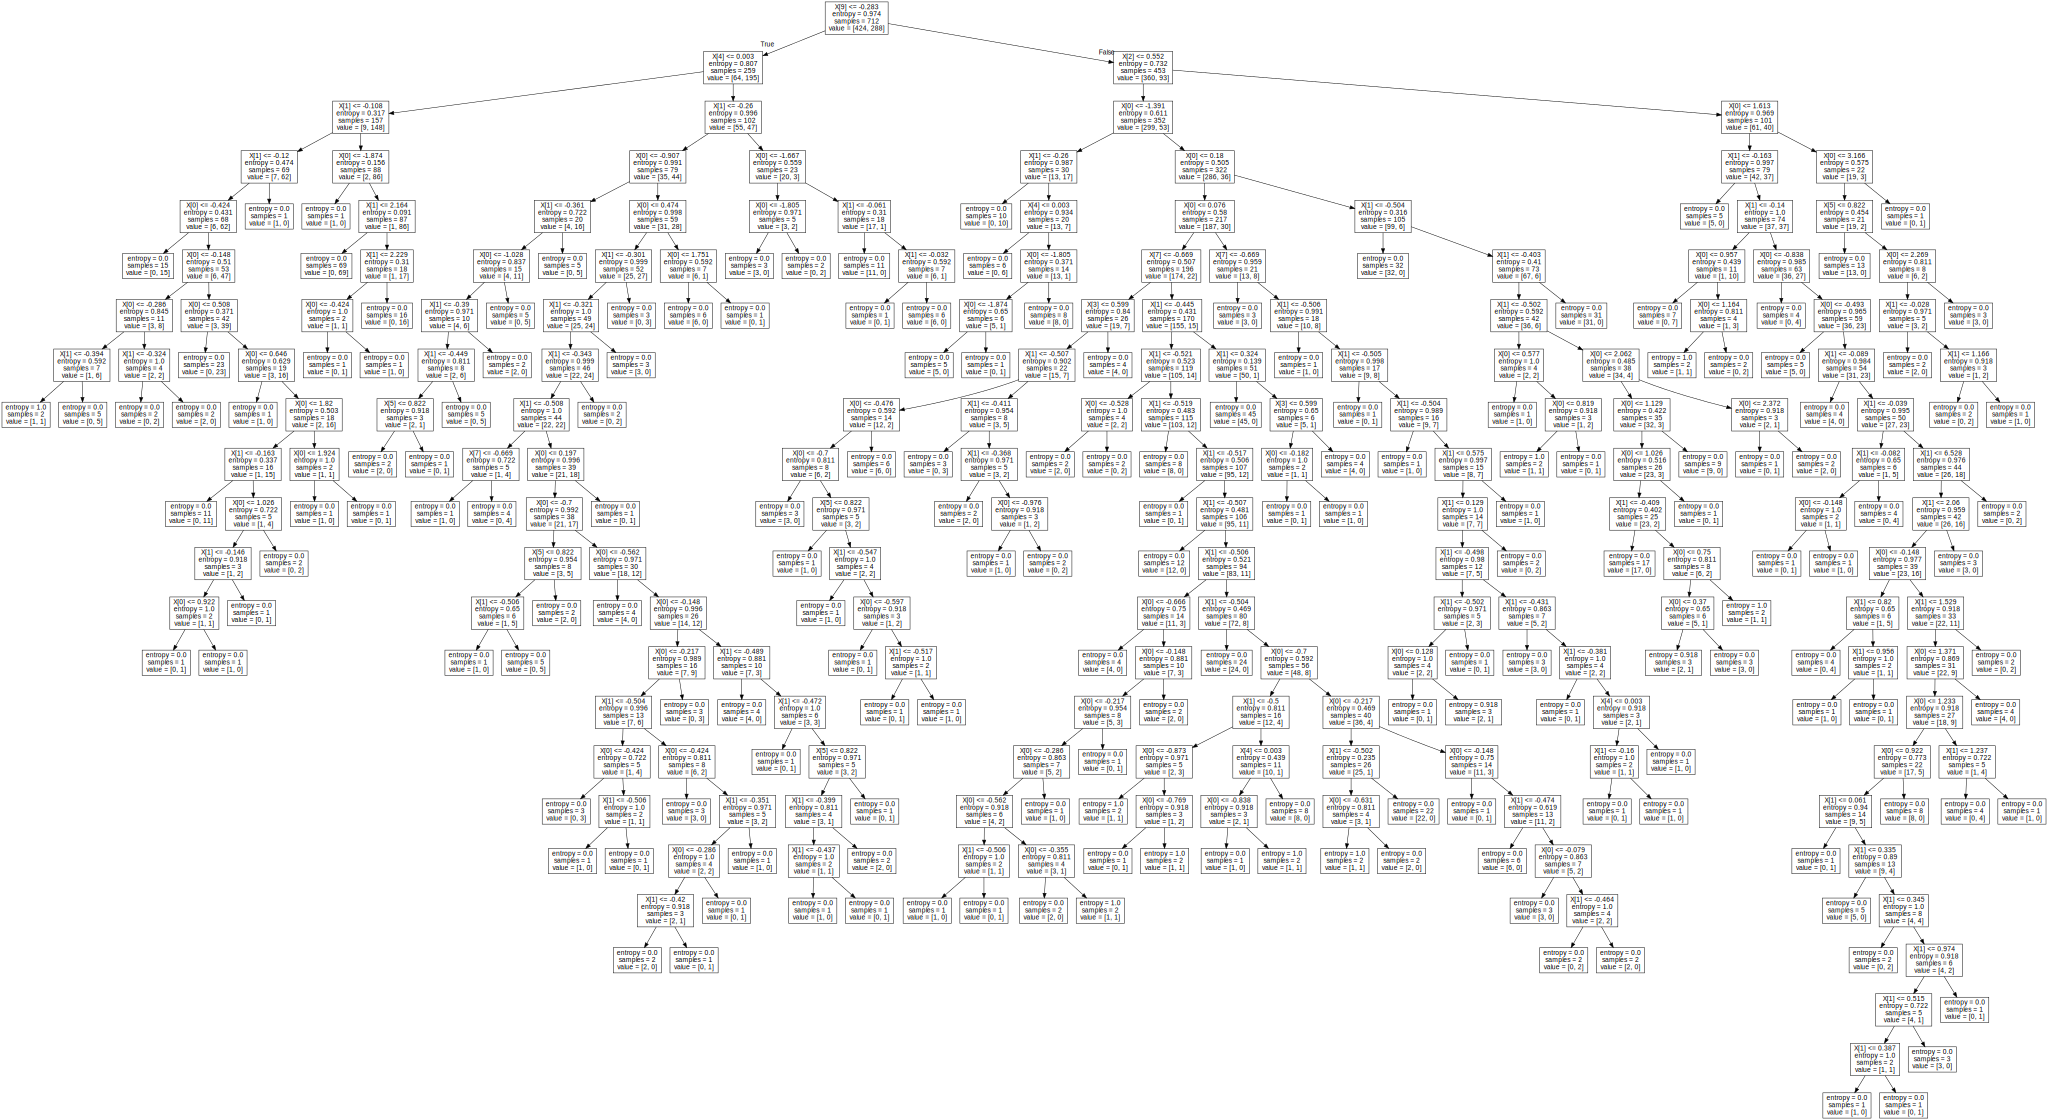

In [ ]:
myTreeData = tree.export_graphviz(myTree)
graphData = graphviz.Source(myTreeData)
graphData

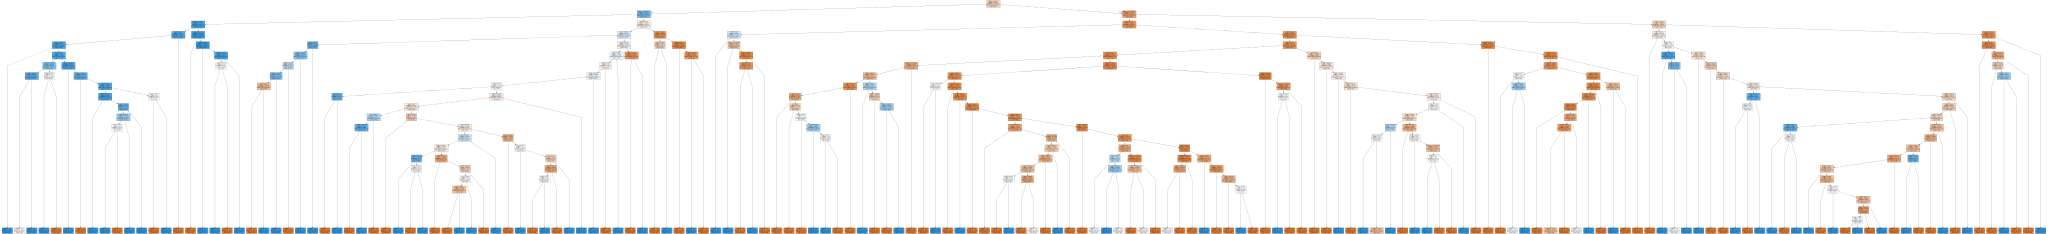

In [ ]:
feature_names = ['Age','Fare','Class_1','Class_2', 'Class_3', 'C', 'Q', 'S', 'female', 'male']
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(myTree,feature_names=feature_names,
class_names=class_names, leaves_parallel=True,
filled=True, proportion=True, rotate=False)
graphData = graphviz.Source(myTreeData)
graphData

#### Max Depth

[Text(0.5, 0.8333333333333334, 'X[9] <= -0.283\nentropy = 0.974\nsamples = 712\nvalue = [424, 288]'),
 Text(0.25, 0.5, 'X[4] <= 0.003\nentropy = 0.807\nsamples = 259\nvalue = [64, 195]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.317\nsamples = 157\nvalue = [9, 148]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.996\nsamples = 102\nvalue = [55, 47]'),
 Text(0.75, 0.5, 'X[2] <= 0.552\nentropy = 0.732\nsamples = 453\nvalue = [360, 93]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.611\nsamples = 352\nvalue = [299, 53]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.969\nsamples = 101\nvalue = [61, 40]')]

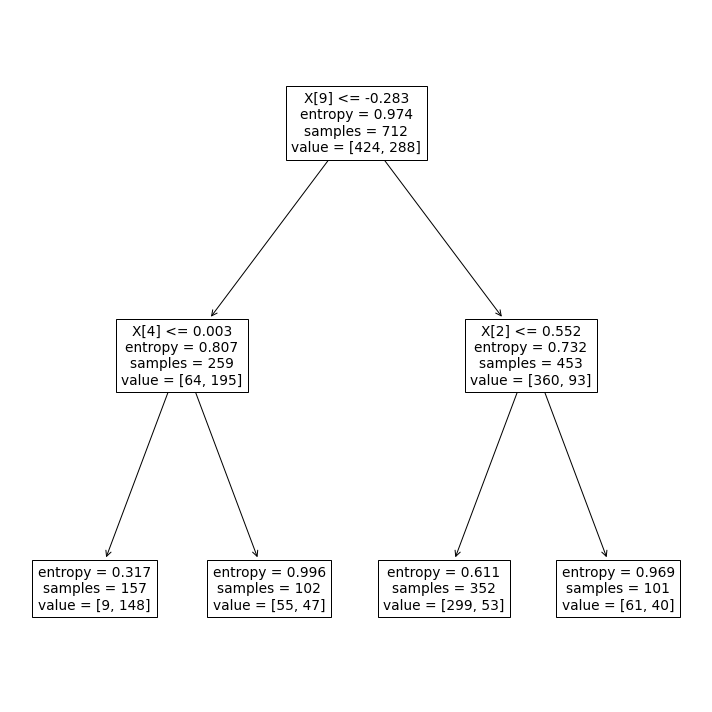

In [ ]:
myTree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
myTree2.fit(dt_x,dt_y)
tree.plot_tree(myTree2)

#### Min Split

[Text(0.4705423940149626, 0.9782608695652174, 'X[9] <= -0.283\nentropy = 0.974\nsamples = 712\nvalue = [424, 288]'),
 Text(0.19326683291770574, 0.9347826086956522, 'X[4] <= 0.003\nentropy = 0.807\nsamples = 259\nvalue = [64, 195]'),
 Text(0.09226932668329177, 0.8913043478260869, 'X[1] <= -0.108\nentropy = 0.317\nsamples = 157\nvalue = [9, 148]'),
 Text(0.06483790523690773, 0.8478260869565217, 'X[1] <= -0.12\nentropy = 0.474\nsamples = 69\nvalue = [7, 62]'),
 Text(0.05486284289276808, 0.8043478260869565, 'X[0] <= -0.424\nentropy = 0.431\nsamples = 68\nvalue = [6, 62]'),
 Text(0.04488778054862843, 0.7608695652173914, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.06483790523690773, 0.7608695652173914, 'X[0] <= -0.148\nentropy = 0.51\nsamples = 53\nvalue = [6, 47]'),
 Text(0.0399002493765586, 0.717391304347826, 'X[0] <= -0.286\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.0199501246882793, 0.6739130434782609, 'X[1] <= -0.394\nentropy = 0.592\nsamples = 7\nvalue = [1,

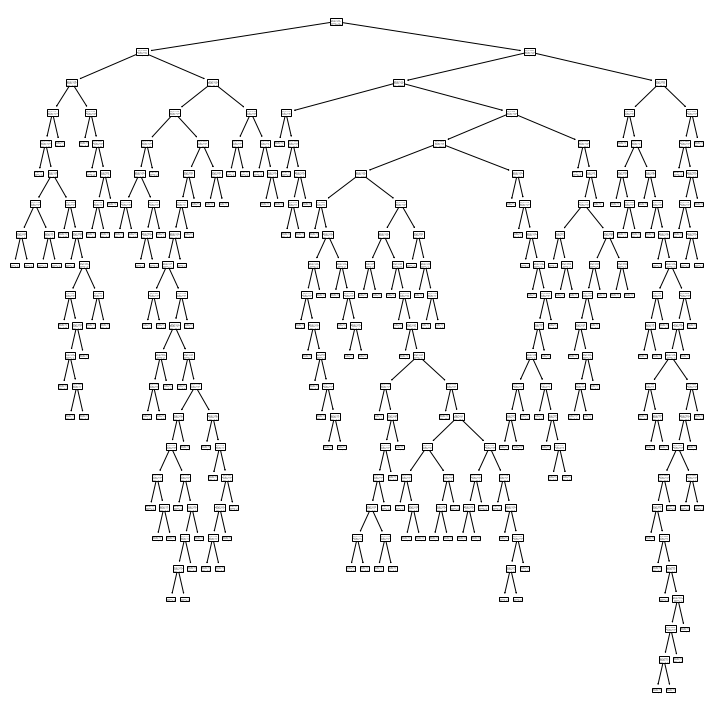

In [ ]:
myTree3 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=2)
myTree3.fit(dt_x,dt_y)
tree.plot_tree(myTree3)

### Matriz de Confusión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#dt_x , dt_y
#train_x, train_y 
#test_x, test_y

myTree = DecisionTreeClassifier(random_state=0)

treeParams = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
            
gridSearch = GridSearchCV(myTree, treeParams, cv=10, refit='AUC')
gridSearch.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [ ]:
yPredict1 = gridSearch.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(test_y, yPredict1))

Accuracy score for test data is: 0.7808988764044944


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(test_y, yPredict1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  98                  12
Actual Survived              27                  41
